# Imports

In [1]:
import os
os.chdir('/DeepPurpose/')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import random
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from matplotlib.pyplot import figure

In [5]:
load_process_DAVIS()

Beginning Processing...
Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!


(array(['CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
        'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
        'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N', ...,
        'C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=NC=C4',
        'C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=NC=C4',
        'C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=NC=C4'],
       dtype='<U92'),
 array(['MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQP

In [75]:
download_BindingDB()

Beginning to download dataset...
Beginning to extract zip file...
Done!


'./data/BindingDB_All.tsv'

In [2]:
X_drug, X_target, y  = process_BindingDB('/home/sars-busters-consolidated/data/BindingDB_All.tsv',
                                         y = 'Kd', 
                                         binary = True, ## Keep it binary true for classification task
                                         convert_to_log = True)

Loading Dataset from path...


b'Skipping line 896772: expected 193 fields, saw 205\nSkipping line 896798: expected 193 fields, saw 205\n'
b'Skipping line 929491: expected 193 fields, saw 205\n'
b'Skipping line 952161: expected 193 fields, saw 265\n'
b'Skipping line 1355895: expected 193 fields, saw 241\n'
b'Skipping line 1469800: expected 193 fields, saw 241\nSkipping line 1469801: expected 193 fields, saw 241\nSkipping line 1469802: expected 193 fields, saw 241\nSkipping line 1469803: expected 193 fields, saw 241\nSkipping line 1469804: expected 193 fields, saw 241\nSkipping line 1469805: expected 193 fields, saw 241\nSkipping line 1469806: expected 193 fields, saw 241\nSkipping line 1469807: expected 193 fields, saw 241\nSkipping line 1469808: expected 193 fields, saw 241\n'
b'Skipping line 1483073: expected 193 fields, saw 205\n'
b'Skipping line 1502296: expected 193 fields, saw 241\nSkipping line 1502297: expected 193 fields, saw 241\nSkipping line 1502298: expected 193 fields, saw 241\nSkipping line 1502299: e

Beginning Processing...
There are 70750 drug target pairs.
Default binary threshold for the binding affinity scores are 30, you can adjust it by using the "threshold" parameter


# Original DeepPurpose

In [3]:
drug_encoding = 'Transformer'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, 
                                X_target, 
                                y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 128,
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12]
                        )

Drug Target Interaction Prediction Mode...
in total: 70750 drug-target pairs
encoding drug...
unique drugs: 13392
encoding protein...
unique target sequence: 1507
splitting dataset...
Done.


In [34]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()

In [146]:
train.shape

(49525, 6)

In [145]:
test.shape

(11973, 11)

Let's use 4 GPUs!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69598. Total time 0.00305 hours
Training at Epoch 1 iteration 100 with loss 0.37188. Total time 0.01388 hours
Training at Epoch 1 iteration 200 with loss 0.30791. Total time 0.025 hours
Training at Epoch 1 iteration 300 with loss 0.40230. Total time 0.03583 hours
Validation at Epoch 1, AUROC: 0.83072 , AUPRC: 0.55703 , F1: 0.20652 , Cross-entropy Loss: 4.98920
Training at Epoch 2 iteration 0 with loss 0.31423. Total time 0.05 hours
Training at Epoch 2 iteration 100 with loss 0.25581. Total time 0.06111 hours
Training at Epoch 2 iteration 200 with loss 0.35900. Total time 0.07166 hours
Training at Epoch 2 iteration 300 with loss 0.31057. Total time 0.08222 hours
Validation at Epoch 2, AUROC: 0.83965 , AUPRC: 0.59213 , F1: 0.21329 , Cross-entropy Loss: 4.96967
Training at Epoch 3 iteration 0 with loss 0.41414. Total time 0.09611 hours
Training at Epoch 3 iteration 100 with loss 

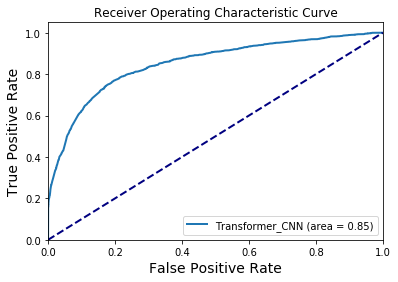

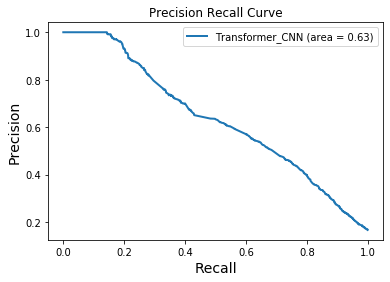

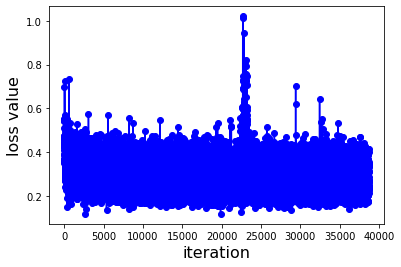

In [4]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [15]:
model.save_model('/home/sars-busters-consolidated/deep_purpose/save_folder/pretrained_model/transformer_CNN')

In [14]:
os.listdir('/home/sars-busters-consolidated/deep_purpose/save_folder/pretrained_model/transformer_CNN')

['deep_purpose',
 'data',
 'vaenet',
 'Network Models',
 'vecnet',
 'siamese',
 'data_preperation',
 'predictions',
 '.ipynb_checkpoints',
 'Paper Visualizations',
 'DeepPurpose2_rm',
 'data_rm']

In [349]:
model = model.load('/home/sars-busters-consolidated/deep_purpose/save_folder/pretrained_model/transformer_CNN')

AttributeError: 'DBTA' object has no attribute 'load'

In [84]:
test_preidcted = model.predict(test)
test['Y_predicted'] = test_preidcted

In [83]:
train.to_csv('../data/Transformer_CNN_train.csv')
val.to_csv('../data/Transformer_CNN_val.csv')
test.to_csv('../data/Transformer_CNN_test.csv')

# Preparing Degree Lists for Original DeepPurpose Data

In [3]:
train = pd.read_csv('../data/DeepPurpose_train.csv')
val = pd.read_csv('../data/DeepPurpose_val.csv')
test = pd.read_csv('../data/DeepPurpose_test.csv')

In [5]:
ligands = list(set(train['SMILES'].tolist()))
targets = list(set(train['Target Sequence'].tolist()))

number_ligands = len(ligands)
number_targets = len(targets)
print('Ligands: ', number_ligands)
print('Targets: ',number_targets)

Ligands:  10416
Targets:  1391


In [6]:
ligands_degree_dict = dict()

for smile_chem in tqdm(ligands):
    sum_df = train[train['SMILES'] == smile_chem]
    ligands_degree_dict[smile_chem] = dict()
    ligands_degree_dict[smile_chem]['deg_0'] = len(sum_df[sum_df['Label'] == 0])
    ligands_degree_dict[smile_chem]['deg_1'] = len(sum_df[sum_df['Label'] == 1])
    
targets_degree_dict = dict()

for aa_target in tqdm(targets):
    sum_df = train[train['Target Sequence'] == aa_target]
    targets_degree_dict[aa_target] = dict()
    targets_degree_dict[aa_target]['deg_0'] = len(sum_df[sum_df['Label'] == 0])
    targets_degree_dict[aa_target]['deg_1'] = len(sum_df[sum_df['Label'] == 1])
    
degree_train_1_0_ligands = [ligands_degree_dict[key_val]['deg_1'] for key_val in tqdm(ligands_degree_dict.keys())]
degree_train_0_1_ligands = [ligands_degree_dict[key_val]['deg_0'] for key_val in tqdm(ligands_degree_dict.keys())]

degree_train_1_0_targets = [targets_degree_dict[key_val]['deg_1'] for key_val in tqdm(targets_degree_dict.keys())]
degree_train_0_1_targets = [targets_degree_dict[key_val]['deg_0'] for key_val in tqdm(targets_degree_dict.keys())]

100%|██████████| 1391/1391 [00:00<00:00, 1113624.14it/s]


In [7]:
with open('degreetrain10ligands.txt', 'w') as file:
    for degree in degree_train_1_0_ligands:
        file.write("%i\n" % degree)
        
file.close()

with open('degreetrain01ligands.txt', 'w') as file:
    for degree in degree_train_0_1_ligands:
        file.write("%i\n" % degree)
        
file.close()

with open('degreetrain10targets.txt', 'w') as file:
    for degree in degree_train_1_0_targets:
        file.write("%i\n" % degree)
        
file.close()

with open('degreetrain01targets.txt', 'w') as file:
    for degree in degree_train_0_1_targets:
        file.write("%i\n" % degree)
        
file.close()

textfile = open("ligands.txt", "w")
for element in ligands:
    textfile.write(element + "\n")
textfile.close()

textfile = open("targets.txt", "w")
for element in targets:
    textfile.write(element + "\n")
textfile.close()

# Prediction on SARS-CoV2 Sequences

In [4]:
train = pd.read_csv('../data/Transformer_CNN_train.csv')
val = pd.read_csv('../data/Transformer_CNN_val.csv')
test = pd.read_csv('../data/Transformer_CNN_test.csv')

In [9]:
external_targets = pd.read_csv('/data/External Predictions/SARS Sequences/20201203_Targets_Sequences_SARS_Cov2.csv')

In [157]:
train_chemicals = dict()

for index, row in tqdm(train.iterrows()):
    train_chemicals[row['SMILES']] = row['drug_encoding']

49525it [00:04, 10161.42it/s]


In [158]:
sars_targets = dict()

for index, row in tqdm(external_targets.iterrows()):
    sars_targets[row['ID']] = row['Sequence']

33it [00:00, 5347.81it/s]


In [163]:
SMILES_list = []
target_seq_list = []
# drug_encoding_list = []
# target_encoding_list = []

sars_test = pd.DataFrame()

for ligand in tqdm(list(train_chemicals.keys())):
    for target in list(sars_targets.keys()):
        SMILES_list.append(ligand)
        target_seq_list.append(sars_targets[target])
        # drug_encoding_list.append(train_chemicals[ligand])
        # target_encoding_list.append(list(sars_targets[target])) # + ['?'] * (1000 - len(list(sars_targets[target]))))
        
sars_test['SMILES'] = SMILES_list
sars_test['Target Sequence'] = target_seq_list
# sars_test['drug_encoding'] = drug_encoding_list
# sars_test['target_encoding'] = target_encoding_list
sars_test['Label'] = 1

100%|██████████| 10416/10416 [00:00<00:00, 108051.10it/s]


In [164]:
sars_test_processed, _, _ = data_process(sars_test['SMILES'], 
                         sars_test['Target Sequence'], 
                         y, 
                         drug_encoding,
                         target_encoding, 
                         split_method='random',
                         frac=[1.0,0,0])

Drug Target Interaction Prediction Mode...
in total: 70750 drug-target pairs
encoding drug...
unique drugs: 2144
encoding protein...
unique target sequence: 33
splitting dataset...
Done.


In [166]:
sars_test_preidcted = model.predict(sars_test_processed)

predicting...


In [167]:
sars_test_processed['Y_predicted'] = sars_test_preidcted

In [168]:
sars_test_processed.to_csv('sars_test_processed.csv')

In [2]:
sars_test_processed = pd.read_csv('sars_test_processed.csv')

In [5]:
# model.__dict__

ligands = list(set(sars_test_processed['SMILES'].tolist()))
ligand_degree_dict = dict()

train_pos = train[train['Label'] == 1]
train_neg = train[train['Label'] == 0]

for ligand in tqdm(ligands):
    ligand_degree_dict[ligand] = dict()
    ligand_degree_dict[ligand]['pos_deg'] = len(train_pos[train_pos['SMILES'] == ligand])
    ligand_degree_dict[ligand]['neg_deg'] = len(train_neg[train_neg['SMILES'] == ligand])
    

100%|██████████| 2144/2144 [00:13<00:00, 157.68it/s]


In [6]:
pos_deg_list = []
neg_deg_list = []
deg_ratio_list = []

for index, row in tqdm(sars_test_processed.iterrows()):
    
    if ligand_degree_dict[row['SMILES']]['pos_deg'] + ligand_degree_dict[row['SMILES']]['neg_deg'] != 0:
        pos_deg_list.append(ligand_degree_dict[row['SMILES']]['pos_deg'])
        neg_deg_list.append(ligand_degree_dict[row['SMILES']]['neg_deg'])
        deg_ratio_list.append(ligand_degree_dict[row['SMILES']]['pos_deg']/(ligand_degree_dict[row['SMILES']]['pos_deg']+ligand_degree_dict[row['SMILES']]['neg_deg']))
    else:
        pos_deg_list.append(-1)
        neg_deg_list.append(-1)
        deg_ratio_list.append(-1)
        
sars_test_processed['pos_deg'] = pos_deg_list
sars_test_processed['neg_deg'] = neg_deg_list
sars_test_processed['deg_ratio'] = deg_ratio_list

70750it [00:11, 5949.20it/s]


In [7]:
sars_test_processed = sars_test_processed[sars_test_processed['deg_ratio'] != -1]

In [10]:
sars_test_processed_subset = sars_test_processed[sars_test_processed['Target Sequence'].isin(external_targets['Sequence'].tolist()[0:1])]

In [11]:
sars_test_processed_subset

,Unnamed: 0,SMILES,Target Sequence,Label,drug_encoding,target_encoding,Y_predicted,pos_deg,neg_deg,deg_ratio
0,0,Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,1,"(array([ 757, 286, 178, 965, 22, 763, 10...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,1,0,1.00
33,33,COc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,1,"(array([ 467, 286, 178, 965, 22, 763, 10...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,1,0,1.00
66,66,NS(=O)(=O)c1ccc(s1)S(=O)(=O)NCc1cccs1,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,0,"(array([2070, 1446, 2218, 127, 640, 0, ...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,1,0,1.00
99,99,NS(=O)(=O)c1cc2C(O)CN(Cc3cccs3)S(=O)(=O)c2s1,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,0,"(array([ 286, 113, 122, 96, 234, 1545, 9...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,1,0,1.00
132,132,COc1ccc(cc1)N1CC(O)c2cc(sc2S1(=O)=O)S(N)(=O)=O,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,0,"(array([ 428, 881, 96, 255, 818, 2137, ...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,1,0,1.00
...,...,...,...,...,...,...,...,...,...,...
70587,70587,COc1nc2ccc(cc2c(Cl)c1OCC(F)(F)F)C(O)(c1cnc(C)n...,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,0,"(array([ 92, 607, 1071, 755, 70, 119, 1...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,1,0,1.00
70620,70620,COc1cc(OC)c2CN(CCN(c3ccc4ncc(nc4c3)-c3cnn(C)c3...,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,0,"(array([ 287, 677, 277, 596, 379, 611, 3...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,0,7,0.00
70653,70653,COc1cc(OC)c2CN(CCN(c3ccc4ncc(nc4c3)-c3cn[nH]c3...,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,1,"(array([ 287, 677, 277, 596, 379, 611, 3...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,2,6,0.25
70686,70686,COc1cc(O)c2CN(CCN(c3ccc4ncc(nc4c3)-c3cnn(C)c3)...,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,0,"(array([ 287, 744, 277, 596, 379, 611, 3...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,0,8,0.00


In [12]:
from scipy import stats

stats.spearmanr(sars_test_processed['pos_deg'].tolist(),sars_test_processed['Y_predicted'].tolist())

SpearmanrResult(correlation=-6.8207261196245e-05, pvalue=0.9855255390445837)

Text(0, 0.5, 'Prediction - DeepPurpose')

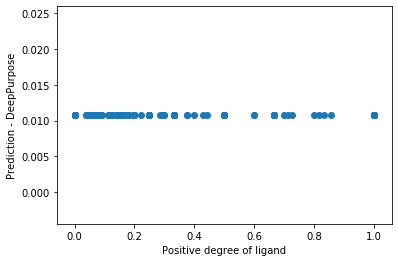

In [13]:
plt.scatter(sars_test_processed_subset['deg_ratio'].tolist(),sars_test_processed_subset['Y_predicted'].tolist())
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Positive degree of ligand')
plt.ylabel('Prediction - DeepPurpose')

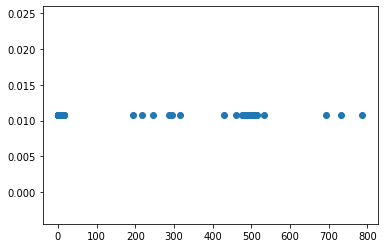

In [14]:
plt.scatter(sars_test_processed_subset['neg_deg'].tolist(),sars_test_processed_subset['Y_predicted'].tolist())

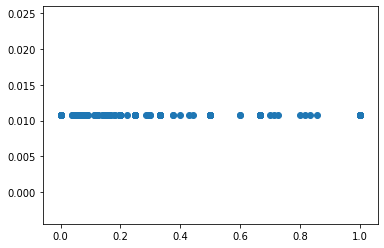

In [15]:
plt.scatter(sars_test_processed_subset['deg_ratio'].tolist(),sars_test_processed_subset['Y_predicted'].tolist())

# Randomly assigning SMILEs and Sequences

In [2]:
def swapper(intake_list):
    
    swap_dict = {}
    bag = set(intake_list)
    buffer = set()
    
    for item in set(intake_list):
        
        if len(bag) > 0:
            #selected = bag.pop()
            selected = random.choice(list(bag))
            bag.remove(selected)
        else:
            selected = random.choice(list(buffer))
            buffer.remove(selected)
        
        if item != selected:
            swap_dict.update({item:selected})
        else:
            print(f'Same item selected item {item} selected {selected}')
            buffer.add(selected)
    
    assert len(bag) == 0, bag
    
    return swap_dict
            

In [3]:
fake_X_drug_mapping = swapper(list(X_drug))

NameError: name 'X_drug' is not defined

In [135]:
fake_X_target_mapping = swapper(list(X_target))

In [138]:
correct_dataset = pd.DataFrame({'X_drug': X_drug, 'X_target': X_target, 'y': y})

In [141]:
correct_dataset['fake_X_drug'] = correct_dataset['X_drug'].map(fake_X_drug_mapping)
correct_dataset['fake_X_target'] = correct_dataset['X_target'].map(fake_X_target_mapping)

In [149]:
for column in correct_dataset.columns:
    print(correct_dataset[correct_dataset[column].isna()])

Empty DataFrame
Columns: [X_drug, X_target, y, fake_X_drug, fake_X_target]
Index: []
Empty DataFrame
Columns: [X_drug, X_target, y, fake_X_drug, fake_X_target]
Index: []
Empty DataFrame
Columns: [X_drug, X_target, y, fake_X_drug, fake_X_target]
Index: []
                                                  X_drug  \
64590  CCOC(=O)\C=C1/C2C(C3CCC2C=C3)C(=O)N1Cc1ccc(cc1...   

                                                X_target  y fake_X_drug  \
64590  MMLNSSTEDGIKRIQDDCPKAGRHNYIFVMIPTLYSIIFVVGIFGN...  1         NaN   

                                           fake_X_target  
64590  MESLVFARRSGPTPSAAELARPLAEGLIKSPKPLMKKQAVKRHHHK...  
Empty DataFrame
Columns: [X_drug, X_target, y, fake_X_drug, fake_X_target]
Index: []


In [151]:
correct_dataset = correct_dataset[~correct_dataset['fake_X_drug'].isna()]

In [152]:
drug_encoding = 'Transformer'
target_encoding = 'CNN'
train, val, test = data_process(list(correct_dataset['fake_X_drug']), 
                                list(correct_dataset['fake_X_target']), 
                                y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 128,
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12]
                        )

Drug Target Interaction Prediction Mode...
in total: 70749 drug-target pairs
encoding drug...
unique drugs: 13391
encoding protein...
unique target sequence: 1507
splitting dataset...
Done.


Let's use 4 GPUs!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69130. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 0.42569. Total time 0.01138 hours
Training at Epoch 1 iteration 200 with loss 0.30406. Total time 0.0225 hours
Training at Epoch 1 iteration 300 with loss 0.28063. Total time 0.03388 hours
Validation at Epoch 1, AUROC: 0.79855 , AUPRC: 0.52682 , F1: 0.23404 , Cross-entropy Loss: 4.92086
Training at Epoch 2 iteration 0 with loss 0.29621. Total time 0.04805 hours
Training at Epoch 2 iteration 100 with loss 0.34574. Total time 0.05944 hours
Training at Epoch 2 iteration 200 with loss 0.26741. Total time 0.07055 hours
Training at Epoch 2 iteration 300 with loss 0.38992. Total time 0.08194 hours
Validation at Epoch 2, AUROC: 0.81727 , AUPRC: 0.55817 , F1: 0.23269 , Cross-entropy Loss: 4.92574
Training at Epoch 3 iteration 0 with loss 0.33012. Total time 0.09611 hours
Training at Epoch 3 iteration 100 with loss 

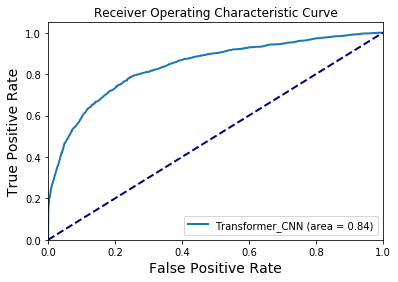

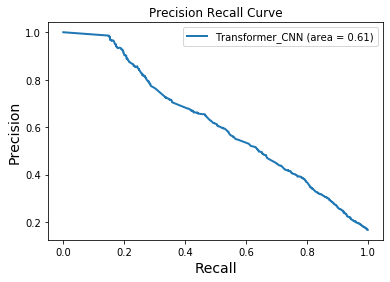

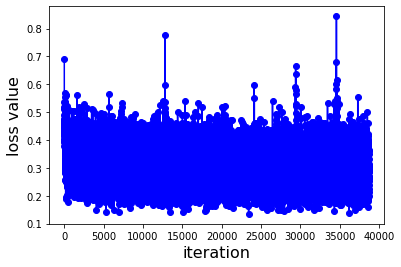

In [153]:
model = models.model_initialize(**config)
model.train(train, val, test)

# Degree Analysis

## Imports

In [10]:
from tqdm import tqdm 

import pickle as pkl

import lxml
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import imdb

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Conv1D, Flatten, MaxPooling1D,\
                        AveragePooling1D, Concatenate, LeakyReLU, Embedding,\
                        GlobalMaxPooling1D,GlobalAveragePooling1D,GaussianNoise,BatchNormalization,Add
from tensorflow.keras.initializers import glorot_uniform
#from tensorflow.keras.utils.vis_utils import plot_model

import importlib
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras.utils import plot_model
import seaborn as sb

## Initialization

In [108]:
train = pd.read_csv('../data/Transformer_CNN_train_fold2.csv')
val = pd.read_csv('../data/Transformer_CNN_val_fold2.csv')
test = pd.read_csv('../data/Transformer_CNN_test_fold2.csv')

#train = pd.read_csv('../data/Transformer_CNN_train.csv')
#val = pd.read_csv('../data/Transformer_CNN_val.csv')
#test = pd.read_csv('../data/Transformer_CNN_test.csv')

In [109]:
train[['SMILES','Target Sequence','Label']].to_csv('../data/deeppurpose_train_edges.csv')

In [110]:
smiles_dataframe = pd.DataFrame()
smiles_dataframe['node'] = list(set(train['SMILES'].tolist())) + list(set(train['Target Sequence'].tolist()))
smiles_dataframe['type'] = ['chemical'] * len(list(set(train['SMILES'].tolist()))) + ['target'] * len(list(set(train['Target Sequence'].tolist())))
smiles_dataframe.to_csv('../data/smiles_gephi.csv')

In [111]:
all_data = pd.concat([train,val,test])

In [112]:
ligand_degree_dict = dict()

for chem in tqdm(set(all_data['SMILES'].tolist())):
    ligand_degree_dict[chem] = dict() 
    sub_df = all_data[all_data['SMILES'] == chem]
    ligand_degree_dict[chem]['pos_deg'] = sub_df['Label'].tolist().count(1)
    ligand_degree_dict[chem]['neg_deg'] = sub_df['Label'].tolist().count(0)
    ligand_degree_dict[chem]['deg_ratio'] = ligand_degree_dict[chem]['pos_deg']/(ligand_degree_dict[chem]['pos_deg']+ligand_degree_dict[chem]['neg_deg'])

100%|██████████| 13392/13392 [01:54<00:00, 117.08it/s]


In [113]:
protein_degree_dict = dict()

for prot in tqdm(set(all_data['Target Sequence'].tolist())):
    protein_degree_dict[prot] = dict() 
    sub_df = all_data[all_data['Target Sequence'] == prot]
    protein_degree_dict[prot]['pos_deg'] = sub_df['Label'].tolist().count(1)
    protein_degree_dict[prot]['neg_deg'] = sub_df['Label'].tolist().count(0)
    protein_degree_dict[prot]['deg_ratio'] = protein_degree_dict[prot]['pos_deg']/(protein_degree_dict[prot]['pos_deg']+protein_degree_dict[prot]['neg_deg'])

100%|██████████| 1507/1507 [00:12<00:00, 118.19it/s]


In [114]:
train_ligand_degree_dict = dict()

for chem in tqdm(set(train['SMILES'].tolist())):
    train_ligand_degree_dict[chem] = dict() 
    sub_df = train[train['SMILES'] == chem]
    train_ligand_degree_dict[chem]['pos_deg'] = sub_df['Label'].tolist().count(1)
    train_ligand_degree_dict[chem]['neg_deg'] = sub_df['Label'].tolist().count(0)
    train_ligand_degree_dict[chem]['deg_ratio'] = train_ligand_degree_dict[chem]['pos_deg']/(train_ligand_degree_dict[chem]['pos_deg'] + train_ligand_degree_dict[chem]['neg_deg'])

100%|██████████| 10432/10432 [01:03<00:00, 163.78it/s]


In [115]:
train_protein_degree_dict = dict()

for prot in tqdm(set(train['Target Sequence'].tolist())):
    train_protein_degree_dict[prot] = dict() 
    sub_df = train[train['Target Sequence'] == prot]
    train_protein_degree_dict[prot]['pos_deg'] = sub_df['Label'].tolist().count(1)
    train_protein_degree_dict[prot]['neg_deg'] = sub_df['Label'].tolist().count(0)
    train_protein_degree_dict[prot]['deg_ratio'] = train_protein_degree_dict[prot]['pos_deg']/(train_protein_degree_dict[prot]['pos_deg'] + train_protein_degree_dict[prot]['neg_deg'])

100%|██████████| 1396/1396 [00:08<00:00, 164.45it/s]


(array([11848.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2302.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

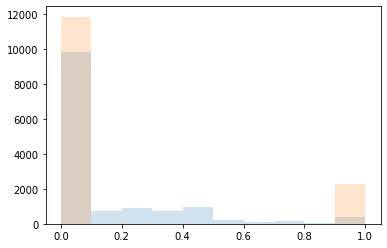

In [120]:
test_preidcted = test['Y_predicted'].tolist()
plt.hist(test_preidcted,alpha=0.2)
plt.hist(test['Label'].tolist(),alpha=0.2)

## Distributions of positive degree and degree ratio

In [184]:
#df = test_false_positive_100_seen_target.sort_values(by='prot_deg_ratio', ascending=False).head(30)
#mydict = dict(zip(df['Target Sequence'],df['prot_deg']))

In [185]:
#df[df['Target Sequence'] == 'MSFPRGSQDRSVGNSSPWWPLTTEGSNGSQEAARLGEGDSPLGDVRNEELAKLEIAVLAVIFVVAVLGNSSVLLALHRTPRKTSRMHLFIRHLSLADLAVAFFQVLPQLCWDITYRFRGPDWLCRVVKHLQVFAMFASAYMLVVMTADRYIAVCHPLKTLQQPARRSRLMIATSWVLSFILSTPQYFIFSVIEIEVNNGTKTQDCWATFIQPWGTRAYVTWMTSGVFVAPVVVLGTCYGFICYHIWRNIRGKTASSRHSKGDKGSGEAVGPFHKGLLVTPCVSSVKSISRAKIRTVKMTFVIVSAYILCWAPFFIVQMWSVWDENFIWTDSENPSITITALLASLNSCCNPWIYMFFSGHLLQDCVQSFPCCHSMAQKFAKDDSDSMSRRQTSYSNNRSPTNSTGMWKDSPKSSKSIRFIPVST']

In [186]:
#mydict

In [121]:
test_false_positive = test[test['Label']==0].sort_values(by='Y_predicted', ascending=False)
test_false_positive_100 = test_false_positive.head(100)

test_ligand_deg = []
test_prot_deg = []
test_ligand_deg_ratio = []
test_prot_deg_ratio = []

for index, row in tqdm(test_false_positive_100.iterrows()):
    if row['SMILES'] in train_ligand_degree_dict.keys():
        test_ligand_deg.append(train_ligand_degree_dict[row['SMILES']]['pos_deg'])
        test_ligand_deg_ratio.append(train_ligand_degree_dict[row['SMILES']]['deg_ratio'])
    else:
        test_ligand_deg.append(-1)
        test_ligand_deg_ratio.append(-1)
    
    if row['Target Sequence'] in train_protein_degree_dict.keys():
        test_prot_deg.append(train_protein_degree_dict[row['Target Sequence']]['pos_deg'])
        test_prot_deg_ratio.append(train_protein_degree_dict[row['Target Sequence']]['deg_ratio'])
    else:
        test_prot_deg.append(-1)
        test_prot_deg_ratio.append(-1)
        
test_false_positive_100['ligand_deg'] = test_ligand_deg
test_false_positive_100['prot_deg'] = test_prot_deg
test_false_positive_100['ligand_deg_ratio'] = test_ligand_deg_ratio
test_false_positive_100['prot_deg_ratio'] = test_prot_deg_ratio

test_false_positive_100_seen_ligand = test_false_positive_100[test_false_positive_100['ligand_deg'] != -1] ## intersection of train and test
test_false_positive_100_seen_target = test_false_positive_100[test_false_positive_100['prot_deg'] != -1] ## intersection of train and test

100it [00:00, 6358.67it/s]
/miniconda/envs/DeepPurpose/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/miniconda/envs/DeepPurpose/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/miniconda/envs/DeepPurpose/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [122]:
all_data_ligand_deg = []
all_data_prot_deg = []
all_data_ligand_deg_ratio = []
all_data_prot_deg_ratio = []

for smile in tqdm(set(all_data['SMILES'].tolist())):
    all_data_ligand_deg.append(ligand_degree_dict[smile]['pos_deg'])
    all_data_ligand_deg_ratio.append(ligand_degree_dict[smile]['deg_ratio'])
                       
for aaseq in tqdm(set(all_data['Target Sequence'].tolist())):
    all_data_prot_deg.append(protein_degree_dict[aaseq]['pos_deg'])
    all_data_prot_deg_ratio.append(protein_degree_dict[aaseq]['deg_ratio'])


100%|██████████| 1507/1507 [00:00<00:00, 607420.35it/s]


(0.001, 1)

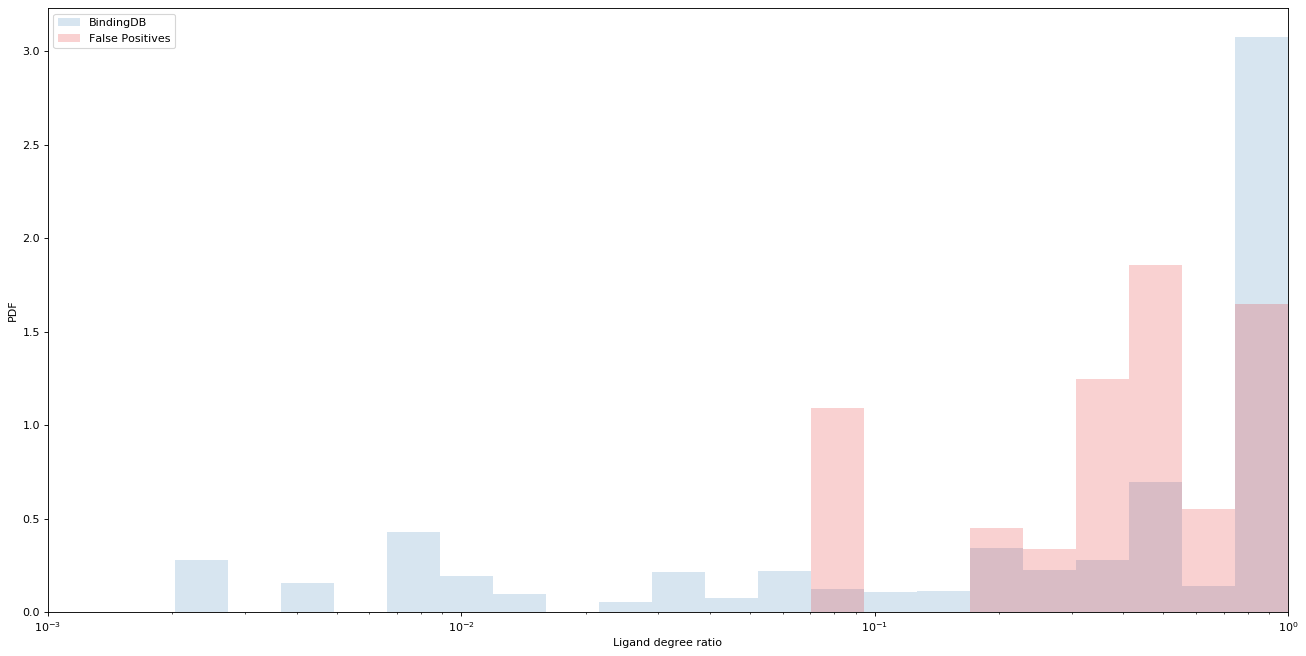

In [123]:
#import seaborn as sns
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
#kwargs = dict(hist_kws={'alpha':.1}, kde_kws={'linewidth':2})
#figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
#sns.distplot(all_data_ligand_deg_ratio, color="#377eb8", label="Top 100", **kwargs)
#sns.distplot(test_false_positive_100_seen_ligand['ligand_deg_ratio'].tolist(), color="#e41a1c", label="Bottom 100", **kwargs)
plt.hist(all_data_ligand_deg_ratio,density=True,color='#377eb8',alpha=0.2,label='BindingDB',bins=np.logspace(np.log10(0.00001),np.log10(1), 40))
plt.hist(test_false_positive_100_seen_ligand['ligand_deg_ratio'].tolist(),density=True,color='#e41a1c',alpha=0.2,label='False Positives',bins=np.logspace(np.log10(0.00001),np.log10(1), 40))
plt.legend()
plt.xlabel('Ligand degree ratio', fontsize=10)
plt.ylabel('PDF', fontsize=10)
plt.xscale('log')
plt.xlim([0.001,1])

(0.006, 1)

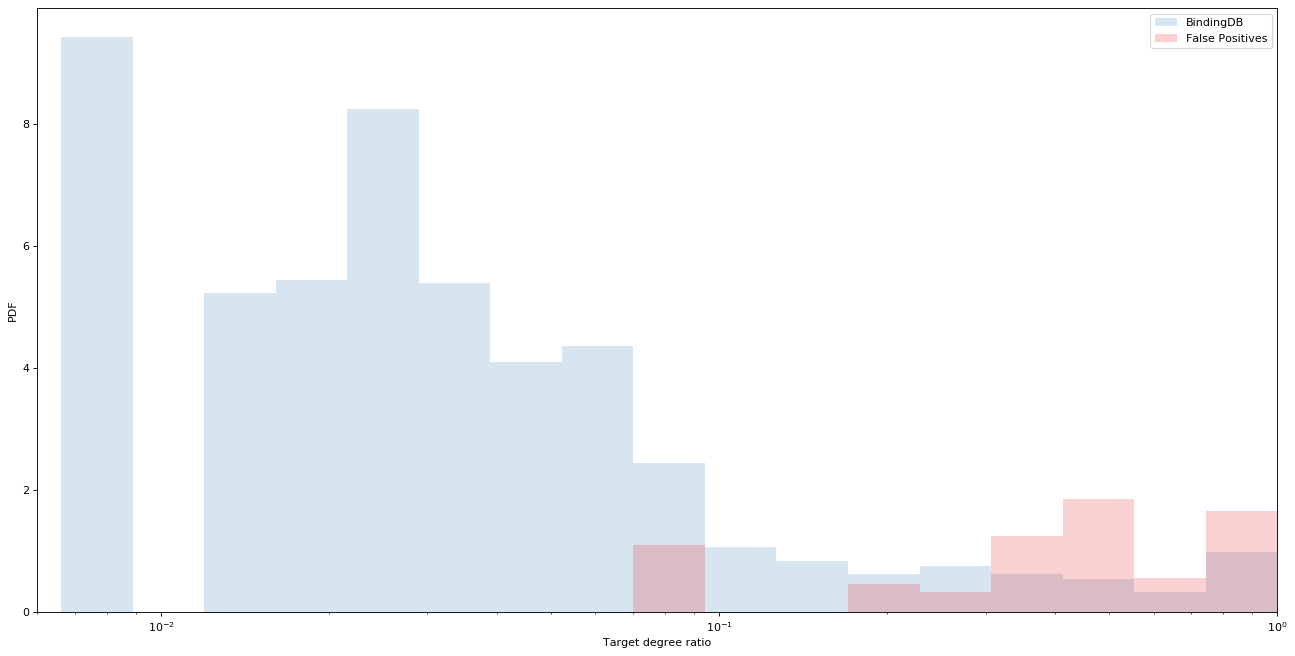

In [124]:
#import seaborn as sns
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
#kwargs = dict(hist_kws={'alpha':.1}, kde_kws={'linewidth':2})
#figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
#sns.distplot(all_data_ligand_deg_ratio, color="#377eb8", label="Top 100", **kwargs)
#sns.distplot(test_false_positive_100_seen_ligand['ligand_deg_ratio'].tolist(), color="#e41a1c", label="Bottom 100", **kwargs)
plt.hist(all_data_prot_deg_ratio,density=True,color='#377eb8',alpha=0.2,label='BindingDB',bins=np.logspace(np.log10(0.00001),np.log10(1), 40))
plt.hist(test_false_positive_100_seen_target['ligand_deg_ratio'].tolist(),density=True,color='#e41a1c',alpha=0.2,label='False Positives',bins=np.logspace(np.log10(0.00001),np.log10(1), 40))
plt.legend()
plt.xlabel('Target degree ratio', fontsize=10)
plt.ylabel('PDF', fontsize=10)
plt.xscale('log')
plt.xlim([0.006,1])

In [125]:
test_false_negative = test[test['Label']==1].sort_values(by='Y_predicted', ascending=True)
test_false_negative_100 = test_false_negative.head(100)

test_ligand_deg = []
test_prot_deg = []
test_ligand_deg_ratio = []
test_prot_deg_ratio = []

for index, row in tqdm(test_false_negative_100.iterrows()):
    if row['SMILES'] in train_ligand_degree_dict.keys():
        test_ligand_deg.append(train_ligand_degree_dict[row['SMILES']]['pos_deg'])
        test_ligand_deg_ratio.append(train_ligand_degree_dict[row['SMILES']]['deg_ratio'])
    else:
        test_ligand_deg.append(-1)
        test_ligand_deg_ratio.append(-1)
    
    if row['Target Sequence'] in train_protein_degree_dict.keys():
        test_prot_deg.append(train_protein_degree_dict[row['Target Sequence']]['pos_deg'])
        test_prot_deg_ratio.append(train_protein_degree_dict[row['Target Sequence']]['deg_ratio'])
    else:
        test_prot_deg.append(-1)
        test_prot_deg_ratio.append(-1)
        
test_false_negative_100['ligand_deg'] = test_ligand_deg
test_false_negative_100['prot_deg'] = test_prot_deg
test_false_negative_100['ligand_deg_ratio'] = test_ligand_deg_ratio
test_false_negative_100['prot_deg_ratio'] = test_prot_deg_ratio

test_false_negative_100_seen_ligand = test_false_negative_100[test_false_negative_100['ligand_deg'] != -1] ## intersection of train and test
test_false_negative_100_seen_target = test_false_negative_100[test_false_negative_100['prot_deg'] != -1] ## intersection of train and test

100it [00:00, 6007.65it/s]
/miniconda/envs/DeepPurpose/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/miniconda/envs/DeepPurpose/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/miniconda/envs/DeepPurpose/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

(0.001, 1)

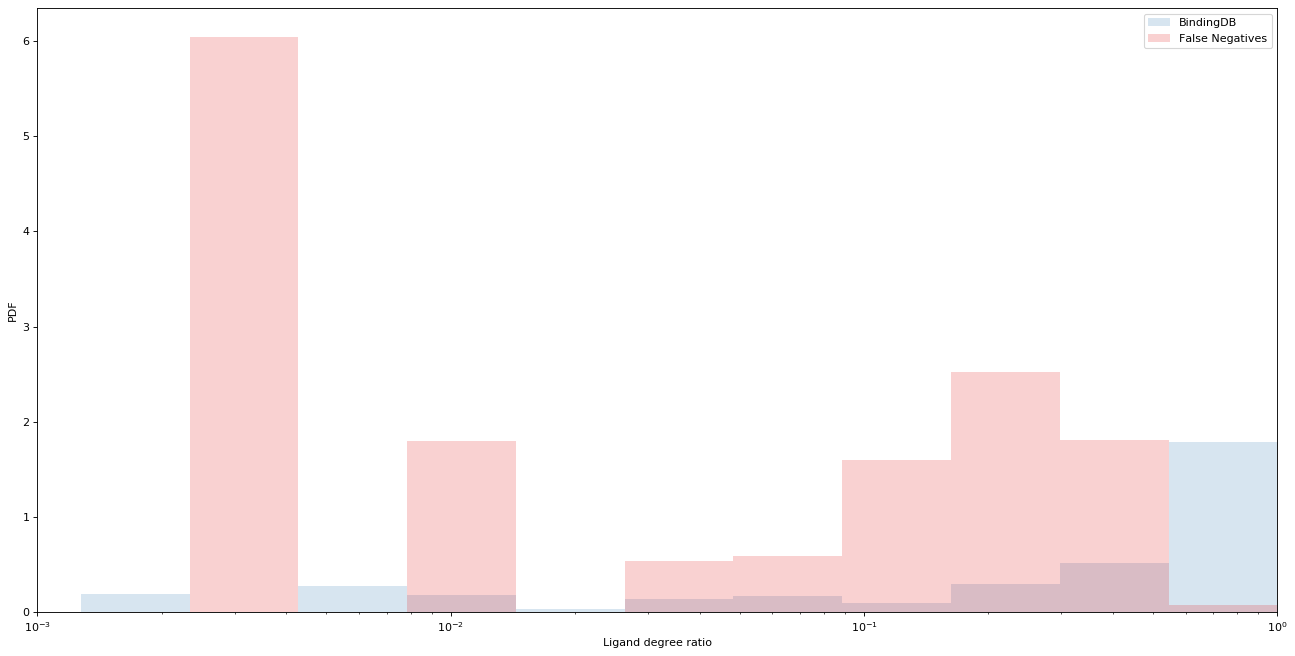

In [126]:
#import seaborn as sns
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
#kwargs = dict(hist_kws={'alpha':.1}, kde_kws={'linewidth':2})
#figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
#sns.distplot(all_data_ligand_deg_ratio, color="#377eb8", label="Top 100", **kwargs)
#sns.distplot(test_false_positive_100_seen_ligand['ligand_deg_ratio'].tolist(), color="#e41a1c", label="Bottom 100", **kwargs)
plt.hist(all_data_ligand_deg_ratio,density=True,color='#377eb8',alpha=0.2,label='BindingDB',bins=np.logspace(np.log10(0.00001),np.log10(1), 20))
plt.hist(test_false_negative_100_seen_ligand['ligand_deg_ratio'].tolist(),density=True,color='#e41a1c',alpha=0.2,label='False Negatives',bins=np.logspace(np.log10(0.00001),np.log10(1), 20))
plt.legend()
plt.xlabel('Ligand degree ratio', fontsize=10)
plt.ylabel('PDF', fontsize=10)
plt.xscale('log')
plt.xlim([0.001,1])

(0.006, 1)

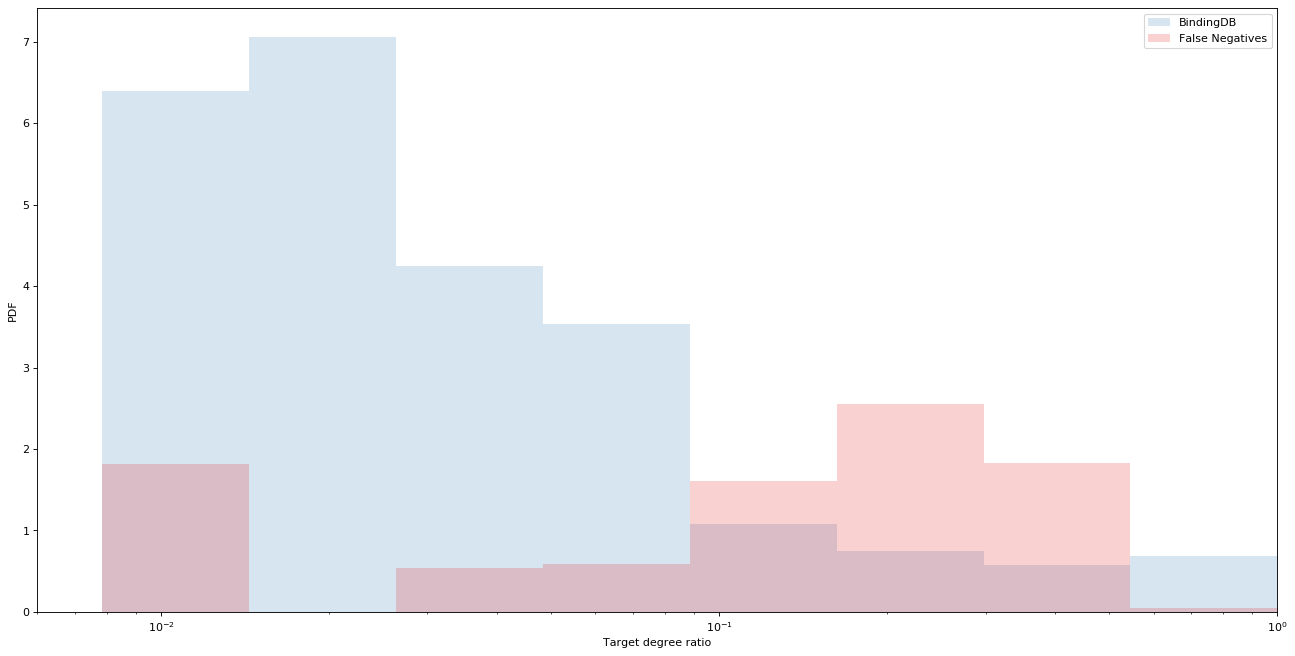

In [127]:
#import seaborn as sns
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
#kwargs = dict(hist_kws={'alpha':.1}, kde_kws={'linewidth':2})
#figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
#sns.distplot(all_data_ligand_deg_ratio, color="#377eb8", label="Top 100", **kwargs)
#sns.distplot(test_false_positive_100_seen_ligand['ligand_deg_ratio'].tolist(), color="#e41a1c", label="Bottom 100", **kwargs)
plt.hist(all_data_prot_deg_ratio,density=True,color='#377eb8',alpha=0.2,label='BindingDB',bins=np.logspace(np.log10(0.00001),np.log10(1), 20))
plt.hist(test_false_negative_100_seen_target['ligand_deg_ratio'].tolist(),density=True,color='#e41a1c',alpha=0.2,label='False Negatives',bins=np.logspace(np.log10(0.00001),np.log10(1), 20))
plt.legend()
plt.xlabel('Target degree ratio', fontsize=10)
plt.ylabel('PDF', fontsize=10)
plt.xscale('log')
plt.xlim([0.006,1])

In [128]:
def remove_zeros(x_i,k_i):
    x_i_return = []
    k_i_return = []
    for i in range(len(x_i)):
        if x_i[i] != 0:
            x_i_return.append(x_i[i])
            k_i_return.append(k_i[i])
    return x_i_return, k_i_return


def log_binning_function(x_i,k_i,B = 20):  # Default number of bins is 20
    
    x_i,k_i = remove_zeros(x_i,k_i)

    b_1 = min(x_i)
    b_Bp1 = max(x_i)
    q_1 = np.log(b_1)
    q_Bp1 = np.log(b_Bp1)
    D_q = q_Bp1 - q_1
    L_q = D_q / B

    q_list = []
    b_list = []

    for i in range(B):
        j = i + 1
        q_list.append(q_1 + (j-1)*L_q)
        b_list.append(np.exp(q_1 + (j-1)*L_q))

    # b_list.insert(0,b_1)
    # b_list.append(b_Bp1)
    
    binned_x_i = []
    binned_k_i = []

    for i in range(len(b_list)-1):
        bin_low = b_list[i]
        bin_high = b_list[i+1]
        indices = []
        for j in range(len(x_i)):
            if x_i[j] >= bin_low and x_i[j] < bin_high:
                indices.append(j)
        if not indices:
            continue
            # binned_k_i.append(float('nan'))
        else:
            bin_y_average = sum([k_i[index] for index in indices]) / len(indices)
            binned_k_i.append(bin_y_average)
            binned_x_i.append(bin_low)
            
    return binned_x_i, binned_k_i

In [129]:
from scipy import stats

stats.spearmanr(test_false_positive_100_seen_ligand['ligand_deg_ratio'].tolist(),test_false_positive_100_seen_ligand['Y_predicted'].tolist())

SpearmanrResult(correlation=0.33951006109077064, pvalue=0.006058749599958364)

Text(0, 0.5, 'DeepPurpose Prediction')

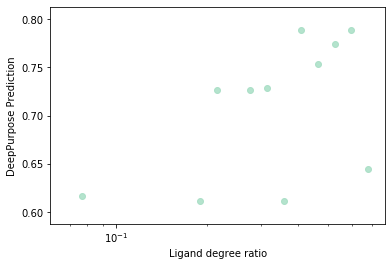

In [132]:
binned_x_i, binned_k_i = log_binning_function(test_false_positive_100_seen_ligand['ligand_deg_ratio'].tolist(),test_false_positive_100_seen_ligand['Y_predicted'].tolist())
plt.scatter(binned_x_i, binned_k_i,alpha=0.8, color= '#A2DCC1')
plt.xscale('log')
#plt.yscale('log')
#plt.ylim([0,0.03])
plt.xlabel('Ligand degree ratio',fontsize=10)
plt.ylabel('DeepPurpose Prediction',fontsize=10)

In [133]:
stats.spearmanr(test_false_positive_100_seen_target['prot_deg_ratio'].tolist(),test_false_positive_100_seen_target['Y_predicted'].tolist())

SpearmanrResult(correlation=0.8238825928788429, pvalue=3.6892334342322113e-25)

Text(0, 0.5, 'DeepPurpose Prediction')

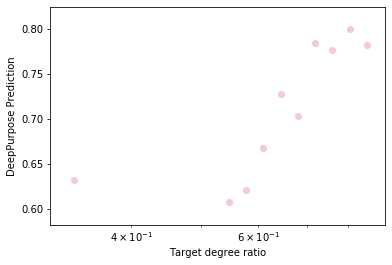

In [134]:
binned_x_i, binned_k_i = log_binning_function(test_false_positive_100_seen_target['prot_deg_ratio'].tolist(),test_false_positive_100_seen_target['Y_predicted'].tolist())
plt.scatter(binned_x_i, binned_k_i,alpha=0.8, color='#F5BFCA')
plt.xscale('log')
#plt.yscale('log')
#plt.ylim([0,0.03])
plt.xlabel('Target degree ratio',fontsize=10)
plt.ylabel('DeepPurpose Prediction',fontsize=10)

In [135]:
stats.spearmanr(test_false_negative_100_seen_ligand['ligand_deg_ratio'].tolist(),test_false_negative_100_seen_ligand['Y_predicted'].tolist())

SpearmanrResult(correlation=0.10545663066774143, pvalue=0.3143958215367761)

Text(0, 0.5, 'DeepPurpose Prediction')

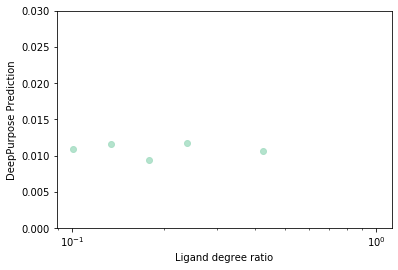

In [136]:
binned_x_i, binned_k_i = log_binning_function(test_false_negative_100_seen_ligand['ligand_deg_ratio'].tolist(),test_false_negative_100_seen_ligand['Y_predicted'].tolist())
plt.scatter(binned_x_i, binned_k_i,alpha=0.8, color = '#A2DCC1')
plt.xscale('log')
#plt.yscale('log')
plt.ylim([0,0.03])
plt.xlabel('Ligand degree ratio',fontsize=10)
plt.ylabel('DeepPurpose Prediction',fontsize=10)

In [137]:
stats.spearmanr(test_false_negative_100_seen_target['prot_deg_ratio'].tolist(),test_false_negative_100_seen_target['Y_predicted'].tolist())

SpearmanrResult(correlation=0.8303142223264981, pvalue=4.098918002948479e-26)

Text(0, 0.5, 'DeepPurpose Prediction')

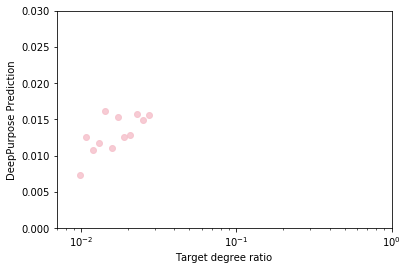

In [138]:
binned_x_i, binned_k_i = log_binning_function(test_false_negative_100_seen_target['prot_deg_ratio'].tolist(),test_false_negative_100_seen_target['Y_predicted'].tolist())
plt.scatter(binned_x_i, binned_k_i,alpha=0.8, color='#F5BFCA')
plt.xscale('log')
#plt.yscale('log')
plt.xlim([0.007,1])
plt.ylim([0,0.03])
plt.xlabel('Target degree ratio',fontsize=10)
plt.ylabel('DeepPurpose Prediction',fontsize=10)

# Performances for Unseen Edges, Unseen Targets and Unseen Nodes

In [94]:
train_ran = pd.read_csv('../data/Transformer_CNN_train.csv')
test_ran = pd.read_csv('../data/Transformer_CNN_test.csv')

In [11]:
train_ligands = list(set(train_ran['SMILES'].tolist()))
train_targets = list(set(train_ran['Target Sequence'].tolist()))

test_minus_train_ligands = list(set(test_ran['SMILES'].tolist()).difference(train_ligands))
test_minus_train_targets = list(set(test_ran['Target Sequence'].tolist()).difference(train_targets))

In [12]:
print('Seen ligands: ', len(train_ligands))
print('Seen targets: ', len(train_targets))
print('Unseen ligands: ', len(test_minus_train_ligands))
print('Unseen targets: ', len(test_minus_train_targets))

Seen ligands:  10416
Seen targets:  1391
Unseen ligands:  2051
Unseen targets:  75


In [17]:
# Unseen Edges

test_unseen_edges = test_ran[test_ran['SMILES'].isin(train_ligands) & test_ran['Target Sequence'].isin(train_targets)]
print('Unseen edges: ', len(test_unseen_edges))

print('AUC: ', roc_auc_score(test_unseen_edges['Label'].tolist(), test_unseen_edges['Y_predicted']))
print('AUP: ', average_precision_score(test_unseen_edges['Label'].tolist(), test_unseen_edges['Y_predicted']))

Unseen edges:  11927
AUC:  0.8159355723996338
AUP:  0.481009834013135


In [18]:
# Unseen Targets

test_unseen_targets = test_ran[test_ran['Target Sequence'].isin(test_minus_train_targets)]
print('Unseen targets: ', len(test_unseen_targets))

print('AUC: ', roc_auc_score(test_unseen_targets['Label'].tolist(), test_unseen_targets['Y_predicted']))
print('AUP: ', average_precision_score(test_unseen_targets['Label'].tolist(), test_unseen_targets['Y_predicted']))

Unseen targets:  80
AUC:  0.7862669245647969
AUP:  0.7844919427109869


In [19]:
# Unseen Nodes

test_unseen_nodes = test_ran[test_ran['SMILES'].isin(test_minus_train_ligands) & test_ran['Target Sequence'].isin(test_minus_train_targets)]
print('Unseen nodes: ', len(test_unseen_nodes))

print('AUC: ', roc_auc_score(test_unseen_nodes['Label'].tolist(), test_unseen_nodes['Y_predicted']))
print('AUP: ', average_precision_score(test_unseen_nodes['Label'].tolist(), test_unseen_nodes['Y_predicted']))

Unseen nodes:  34
AUC:  0.49999999999999994
AUP:  0.36912234170761443


(array([41570.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7955.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

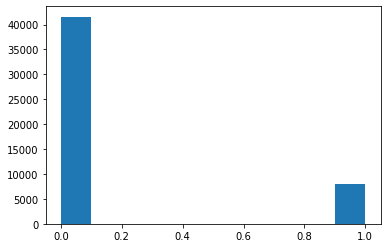

In [24]:
plt.hist(train_ran['Label'].tolist())

(array([11832.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2318.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

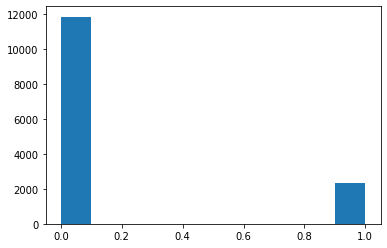

In [25]:
plt.hist(test_ran['Label'].tolist())

In [95]:
train_pos = train_ran[train_ran['Label'] == 1]
train_neg = train_ran[train_ran['Label'] == 0]

ligands_1 = set(train_pos['SMILES'].tolist())
ligands_0 = set(train_neg['SMILES'].tolist())
targets_1 = set(train_pos['Target Sequence'].tolist())
targets_0 = set(train_neg['Target Sequence'].tolist())

print('Total ligands: ', len(list(set(train_ran['SMILES'].tolist()))))
print('Total targets: ', len(list(set(train_ran['Target Sequence'].tolist()))))
print('Ligands with only positive: ', len(list(ligands_1.difference(ligands_0))))
print('Targets with only positive: ', len(list(targets_1.difference(targets_0))))
print('Ligands with only negative: ', len(list(ligands_0.difference(ligands_1))))
print('Targets with only negative: ', len(list(targets_0.difference(targets_1))))

Total ligands:  10416
Total targets:  1391
Ligands with only positive:  3084
Targets with only positive:  168
Ligands with only negative:  6539
Targets with only negative:  556


## Other folds

In [ ]:
Total ligands:  10432
Total targets:  1396
Ligands with only positive:  3130
Targets with only positive:  175
Ligands with only negative:  6520
Targets with only negative:  558

In [ ]:
Total ligands:  10410
Total targets:  1404
Ligands with only positive:  3094
Targets with only positive:  170
Ligands with only negative:  6539
Targets with only negative:  560

In [ ]:
Total ligands:  10410
Total targets:  1404
Ligands with only positive:  3094
Targets with only positive:  170
Ligands with only negative:  6539
Targets with only negative:  560

In [ ]:
Total ligands:  10410
Total targets:  1404
Ligands with only positive:  3094
Targets with only positive:  170
Ligands with only negative:  6539
Targets with only negative:  560

In [2]:
import numpy as np

In [3]:
print(np.mean([3084,3130,3094,3094,3094]))
print(np.std([3084,3130,3094,3094,3094]))

3099.2
15.879546593023367
